In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train=pd.read_csv("session_1_data_train.csv")
test=pd.read_csv("session_1_data_test.csv")

In [13]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [54]:
train.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,181,5450,0,0,0,0,0,1,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,239,486,0,0,0,0,0,1,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,235,1337,0,0,0,0,0,1,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,219,1337,0,0,0,0,0,1,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,217,2032,0,0,0,0,0,1,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [14]:
def replace_label(val):
    if val=='normal.':
        return 'normal'
    else:
        return 'attack' 

In [15]:
train['label']=train['label'].apply(replace_label,1)

In [16]:
train["label"].value_counts()

attack    396761
normal     97260
Name: label, dtype: int64

In [17]:
train.drop_duplicates(subset=None, keep='first',inplace=True)

In [18]:
train['label'].value_counts()

normal    87814
attack    57771
Name: label, dtype: int64

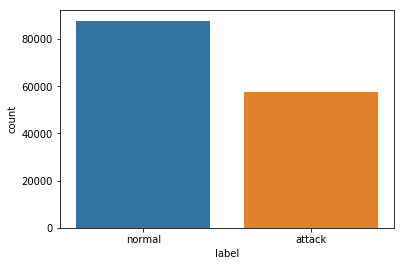

In [19]:
sns.countplot(x='label',data=train)

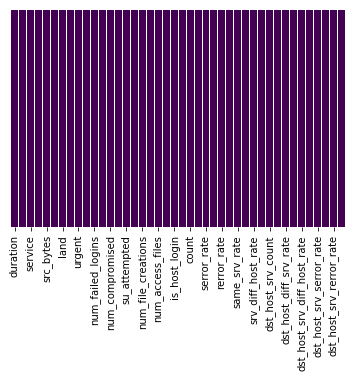

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

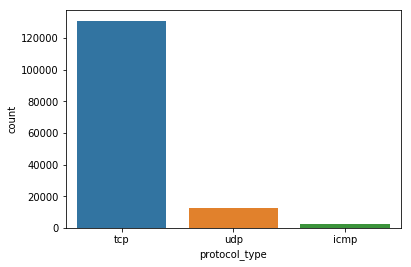

In [26]:
sns.countplot(x="protocol_type",data=train)

In [32]:
protocol=pd.get_dummies(train["protocol_type"],drop_first=True)


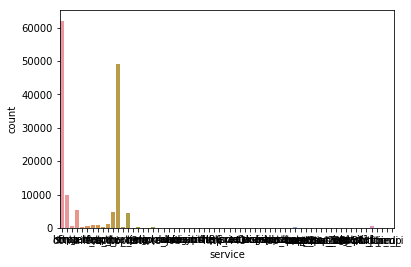

In [38]:
sns.countplot(x="service",data=train)

In [42]:
service=pd.get_dummies(train["service"])


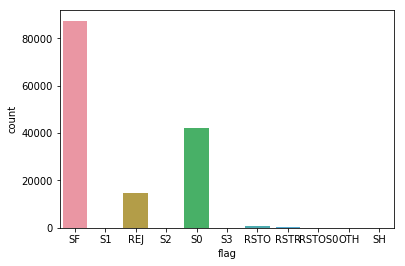

In [43]:
sns.countplot(x="flag",data=train)

In [57]:
flag=pd.get_dummies(train["flag"],drop_first=True)



KeyError: 'flag'

In [56]:
new_label=pd.get_dummies(train["label"],drop_first=True)


KeyError: 'label'

In [52]:
train.drop(["service","flag","label"],axis=1,inplace=True)

In [53]:
train.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,181,5450,0,0,0,0,0,1,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,239,486,0,0,0,0,0,1,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,235,1337,0,0,0,0,0,1,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,219,1337,0,0,0,0,0,1,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,217,2032,0,0,0,0,0,1,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0
